# 일반적인 셋 커버

In [2]:
def set_cover(U, s):
    uncovered = U
    covered = []

    while uncovered:
        best_set = max(s, key=lambda x: len(uncovered.intersection(set(x))))
        covered.append(best_set)
        uncovered -= set(best_set)
    return covered

In [3]:
U = {1, 2, 3, 4, 5, 6, 7, 8, 9}
S = [{1, 2, 3, 4, 5, 6}, {1, 2, 4, 5, 7}, {3, 5, 6, 8, 9}, {6, 9}]
result = set_cover(U, S)
print(result)

[{1, 2, 3, 4, 5, 6}, {3, 5, 6, 8, 9}, {1, 2, 4, 5, 7}]


## 최적해에 더 근접하는 개선된 셋커버

In [4]:
# 요소의 고유갑 구하기
def find_eigen(sets):
    fre = {}
    for subset in sets:
        for element in subset:
            if element in fre:
                fre[element] += 1
            else:
                fre[element] = 1
    return fre

# 초기의 길이를 저장
#(부분집합이 univer에 포함되기 때문에 부분집합이 가지는 갯수만 구하여도 가장 큰 값이 가장 그리디한 선택이 될수있음)
def find_initialsizes(sets):
    initial_sizes = {}
    for i, subset in enumerate(sets):
        initial_sizes[i+1] = len(subset)
    return initial_sizes

def set_cover_improved(universe, sets):
    uncovered = universe
    result = [] # 결과값이 담길 공간
    while uncovered: # univer가 존재하면 계속 반복하여 모든 요소를 커버해라
        bestSubset = {}
        bestCovered = {}
        for subset in sets:
            covered = subset & uncovered
            if len(covered) > len(bestCovered):
                bestSubset = subset 
                bestCovered = covered

        # 중복되는 그리디값이 있다면 초기의 길이가 긴것을 저장
        if len([subset for subset in sets if len(subset & uncovered) == len(bestCovered)])>1:
            initialSizes = find_initialsizes(sets)
            bestSubset = max([subset for subset in sets if len(set(subset) & uncovered) == len(bestCovered)],
                             key=lambda x: initialSizes[sets.index(x)+1])
        
        result.append(bestSubset)
        uncovered -= bestCovered

    frequencies = find_eigen(result)
    # 선택된 값들 중 고유값을 포함하지 않는 집합들을 삭제하는 과정
    for subset in result:
        if all(frequencies[element] != 1 for element in subset):
            result.remove(subset)

    return result

In [5]:
U = {1, 2, 3, 4, 5, 6, 7, 8, 9}
s = [{1, 2, 3, 4, 5, 6}, {1, 2, 4, 5, 7}, {3, 5, 6, 8, 9}, {6, 9}]
print('개선된 셋커버: ', set_cover_improved(U, s))

개선된 셋커버:  [{3, 5, 6, 8, 9}, {1, 2, 4, 5, 7}]


## 그리디와 improved 그리디 난수환경 비교

In [6]:
def calculateSubsetFrequencies(sets):
    frequencies = {}
    for subset in sets:
        for element in subset:
            if element in frequencies:
                frequencies[element] += 1
            else:
                frequencies[element] = 1

    return frequencies


def calculateSubsetInitialSizes(sets):
    initial_sizes = {}
    for i, subset in enumerate(sets):
        initial_sizes[i+1] = len(subset)

    return initial_sizes


def set_cover_improved(universe, sets):
    universe = universe
    for subset in sets:
        universe |= set(subset)

    optimalCover = []
    while universe:
        bestSubset = None
        bestCovered = set()
        for subset in sets:
            covered = set(subset) & universe
            if len(covered) > len(bestCovered):
                bestSubset = subset
                bestCovered = covered

        if bestSubset is None:
            break

        if len([subset for subset in sets if len(set(subset) & universe) == len(bestCovered)]) > 1:
            initialSizes = calculateSubsetInitialSizes(sets)
            bestSubset = max([subset for subset in sets if len(set(subset) & universe) == len(bestCovered)],
                             key=lambda x: initialSizes[sets.index(x)+1])
        
        optimalCover.append(bestSubset)
        universe -= bestCovered
        sets.remove(bestSubset)

    frequencies = calculateSubsetFrequencies(optimalCover)
    updatedOptimalCover = []
    deletedOptimalCover = []

    for subset in optimalCover:
        if any(frequencies[element] == 1 for element in subset):
            updatedOptimalCover.append(subset)
        elif all(frequencies[element] != 1 for element in subset):
            deletedOptimalCover.append(subset)

    return updatedOptimalCover

In [7]:
import random
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

# 선택된 부분집합의 수와 1000개 중에서 몇개가 포함되었는지를 저장할 딕셔너리
greedy_set_totals = defaultdict(int) 
improved_set_totals = defaultdict(int)

# 히스토그램 데이터 수집
greedy_set_data = []
improved_set_data = []

# 이 난수 환경에서 improved가 적을경우는 몇번일까?
count_case = 0

random.seed(43)

def generate_sets(num_points, probability, num_sets):
    universe = set(range(1, num_points + 1))
    sets = []
    for _ in range(num_sets):
        new_set = set()
        for point in range(1, num_points + 1):
            if random.random() <= probability: # 해당 확률보다 작거나 같을 때 그 요소를 포함 
                new_set.add(point)
        sets.append(new_set)
    return sets, universe

num_points = 100  # 요소 개수 
num_sets = 100  # 부분 집합 개수
probability = 0.3  # 부분 집합이 집합의 각 요소를 포함할 확률
n = 1000  # 반복 실행 횟수

for _ in range(n):
    sets, universe = generate_sets(num_points, probability, num_sets)
    greedy_cover = set_cover(universe, sets)
    improved_cover = set_cover_improved(universe, sets)
    greedy_set_totals[len(greedy_cover)] += 1
    improved_set_totals[len(improved_cover)] += 1
    greedy_set_data.append(len(greedy_cover))
    improved_set_data.append(len(improved_cover))
    if(len(greedy_cover)>len(improved_cover)):
        count_case+=1
        

sorted_greedy_totals = sorted(greedy_set_totals.items(), key=lambda x: x[0])
sorted_improved_totals = sorted(improved_set_totals.items(), key=lambda x: x[0])

for length, count in sorted_greedy_totals:
    print(f'선택된 부분집합이 {length}개인 경우의 개수 (그리디 알고리즘): {count}')

print("="*50)
    
for length, count in sorted_improved_totals:
    print(f'선택된 부분집합이 {length}개인 경우의 개수 (개선된 알고리즘): {count}')

선택된 부분집합이 5개인 경우의 개수 (그리디 알고리즘): 50
선택된 부분집합이 6개인 경우의 개수 (그리디 알고리즘): 886
선택된 부분집합이 7개인 경우의 개수 (그리디 알고리즘): 64
선택된 부분집합이 4개인 경우의 개수 (개선된 알고리즘): 7
선택된 부분집합이 5개인 경우의 개수 (개선된 알고리즘): 170
선택된 부분집합이 6개인 경우의 개수 (개선된 알고리즘): 781
선택된 부분집합이 7개인 경우의 개수 (개선된 알고리즘): 42


In [9]:
count_case

152

### plt bar

<Figure size 1000x500 with 0 Axes>

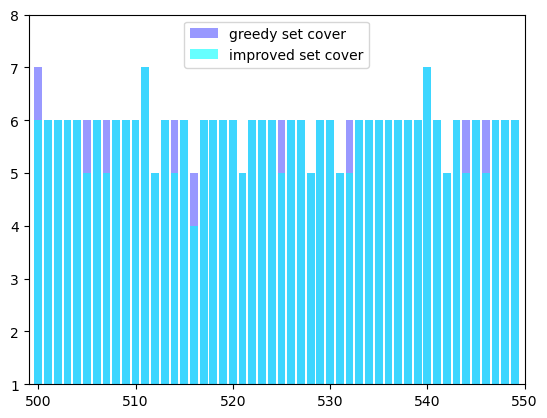

<Figure size 1000x500 with 0 Axes>

In [8]:
hist_set_cover = np.array(greedy_set_data)
hist_improved_set = np.array(improved_set_data)
i = 500
j = 550
y1 = hist_set_cover[i:j]
y2 = hist_improved_set[i:j]
x = np.arange(i, j)
plt.bar(x, y1, alpha=0.4, color = 'blue', label = 'greedy set cover')
plt.bar(x, y2, alpha=0.6, color = 'cyan', label = 'improved set cover')
plt.legend()
plt.axis([i-1, j, 1, 8])
plt.figure (figsize= (10, 5))

In [8]:
result_set = np.sum(hist_set_cover.reshape(10, 100), axis=1)

In [9]:
result_improved = np.sum(hist_improved_set.reshape(10, 100), axis=1)

In [10]:
x_diff = []
for i in range(len(result_set)):
    x_diff.append(result_set[i] - result_improved[i])
print(x_diff)

[13, 16, 18, 20, 13, 17, 12, 14, 18, 15]


## 100개를 하나의 그룹설정하여 차이확인

<function matplotlib.pyplot.show(close=None, block=None)>

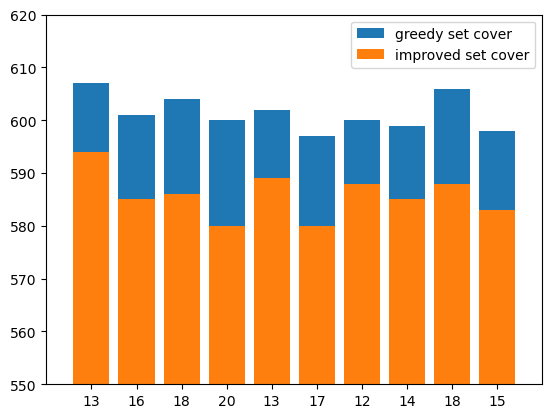

In [11]:
x = np.arange(1, 11)
plt.bar(x, result_set, label = 'greedy set cover')
plt.bar(x, result_improved, label = 'improved set cover')
plt.axis([0, 11, 550, 620])
plt.xticks(x, x_diff)
plt.legend()
plt.show

### 몇번 정도 줄일까?

# 수행시간 비교

## 일반적인 그리디 알고리즘

In [10]:
import time
import random
import pandas as pd

# 입력 크기에 따른 실행 시간 측정
#input_sizes = list(range(1000, 4001, 1000))
input_sizes = list(range(1000, 8001, 500))
execution_times = []
random.seed(43)

for size in input_sizes:
    universe = set(range(1, size+1))
    sets = []
    for _ in range(size):
        subset_size = random.randint(1, size//2)  # 부분집합 크기를 랜덤하게 선택
        subset = set(random.sample(universe, subset_size))  # 부분집합 생성
        sets.append(subset)
        
    start_time = time.time()
    set_cover(universe, sets)
    end_time = time.time()
    execution_time = end_time - start_time
    execution_times.append(execution_time)

# 결과 표 출력
set_time = pd.DataFrame({'Input Size': input_sizes, 'Execution Time': execution_times})
print(set_time)

C:\Users\alstn\AppData\Local\Temp\ipykernel_15436\1930720007.py:16: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  subset = set(random.sample(universe, subset_size))  # 부분집합 생성


    Input Size  Execution Time
0         1000        0.077819
1         1500        0.188222
2         2000        0.348043
3         2500        0.479485
4         3000        0.747282
5         3500        1.166912
6         4000        1.529433
7         4500        2.261059
8         5000        2.632111
9         5500        3.153335
10        6000        3.829401
11        6500        4.226662
12        7000        4.882977
13        7500        5.594883
14        8000        6.204820


## 개선된 그리디 알고리즘

In [11]:
import time
import random
import pandas as pd

input_sizes = list(range(1000, 8001, 500))
execution_times = []
random.seed(43)

for size in input_sizes:
    universe = set(range(1, size+1))
    sets = []
    for _ in range(size):
        subset_size = random.randint(1, size//2)  # 부분집합 크기를 랜덤하게 선택
        subset = set(random.sample(universe, subset_size))  # 부분집합 생성
        sets.append(subset)
        
    start_time = time.time()
    set_cover_improved(universe, sets)
    end_time = time.time()
    execution_time = end_time - start_time
    execution_times.append(execution_time)

# 결과 표 출력
improved_set_time = pd.DataFrame({'Input Size': input_sizes, 'Execution Time': execution_times})
print(improved_set_time)

C:\Users\alstn\AppData\Local\Temp\ipykernel_15436\1406324774.py:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  subset = set(random.sample(universe, subset_size))  # 부분집합 생성


    Input Size  Execution Time
0         1000        0.212432
1         1500        0.499420
2         2000        0.905483
3         2500        1.363612
4         3000        1.873861
5         3500        2.826705
6         4000        4.263036
7         4500        4.564321
8         5000        6.472080
9         5500        8.026492
10        6000        8.770546
11        6500       10.425157
12        7000       12.334184
13        7500       13.164269
14        8000       14.327772


## 브루트 포스 방식

In [ ]:
import itertools

def set_cover_brute_force(universe, sets):
    # 모든 가능한 집합 조합 생성
    all_combinations = []
    for r in range(1, len(sets) + 1):
        combinations = itertools.combinations(sets, r)
        all_combinations.extend(combinations)

    best_cover = None
    best_cover_size = float('inf')

    # 모든 조합을 순회하며 최적해 찾기
    for combination in all_combinations:
        covered = set().union(*combination)
        if covered == universe and len(combination) < best_cover_size:
            best_cover = combination
            best_cover_size = len(combination)

    return best_cover

import time
import random
import pandas as pd

input_sizes = list(range(1000, 8001, 500))
execution_times = []
random.seed(43)

for size in input_sizes:
    universe = set(range(1, size+1))
    sets = []
    for _ in range(size):
        subset_size = random.randint(1, size//2)  # 부분집합 크기를 랜덤하게 선택
        subset = set(random.sample(universe, subset_size))  # 부분집합 생성
        sets.append(subset)
        
    start_time = time.time()
    set_cover_brute_force(universe, sets)
    end_time = time.time()
    execution_time = end_time - start_time
    execution_times.append(execution_time)

# 결과 표 출력
set_cover_brute_force_time = pd.DataFrame({'Input Size': input_sizes, 'Execution Time': execution_times})
print(improved_set_time)

### 시각화 자료

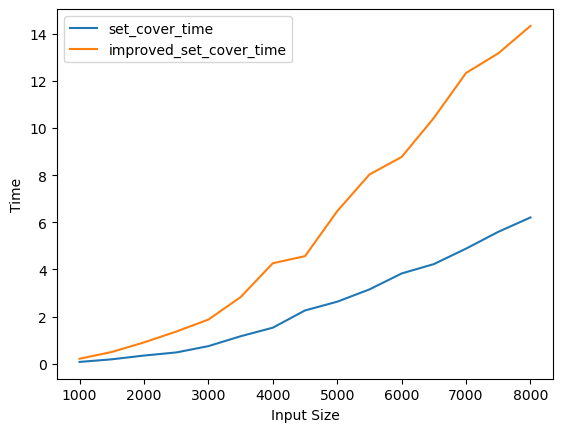

In [12]:
import matplotlib.pyplot as plt

plt.plot(set_time['Input Size'], set_time['Execution Time'], label='set_cover_time')
plt.plot(improved_set_time['Input Size'], improved_set_time['Execution Time'], label='improved_set_cover_time')
plt.xlabel('Input Size')
plt.ylabel('Time')
plt.legend()

plt.show()